# Code for Stage B Graded Assessment 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#importing the dataset
data = pd.read_csv("energydata_complete.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [3]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


<AxesSubplot:ylabel='Density'>

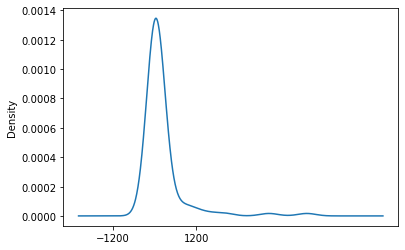

In [4]:
data["Appliances"].value_counts().plot(kind='kde', xticks=[-1200, 1200])


#### Since mean>median, this is a right-skewed distribution 

### Splitting the dataset 

In [5]:
x = data["T2"]
y = data["T6"]

#using train_test_split method to split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Scaling the data 

In [6]:
#using MinMaxScaler method from sklearn to normalize the data 
from sklearn.preprocessing import MinMaxScaler

#creating an object of MinMaxScaler
scaler = MinMaxScaler()

#transforming and scaling the data
try:
    rescaled_x_train = scaler.fit_transform(x_train)
    rescaled_x_train = scaler.transform(rescaled_x_train)
    
    rescaled_x_test = scaler.fit_transform(x_test)
    rescaled_x_test = scaler.transform(rescaled_x_test)
except ValueError:
    #feature_range = (0,1)
    rescaled_x_train = (x_train-x_train.min(axis=0))/(x_train.max(axis=0)-x_train.min(axis=0))
    rescaled_x_test = (x_test-x_test.min(axis=0))/(x_test.max(axis=0)-x_test.min(axis=0))
    

### Fitting the model  

In [7]:
#creating an object of class 'LinearRegression' to perform linear regression
model = LinearRegression()

try:
    model.fit(rescaled_x_train, y_train)

    predicted_y = model.predict(rescaled_x_test)
except ValueError:
    None

In [8]:
#calculating the coefficient of determination using r2_score from sklearn

r2_score = r2_score(y_test, predicted_y)
round(r2_score, 3) 

NameError: name 'predicted_y' is not defined